In [5]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime
# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import contractions
import unicodedata
tokenizer = ToktokTokenizer()
# nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
df = pd.read_csv('reviews_guitars.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59048 entries, 0 to 59047
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rating          59048 non-null  int64 
 1   reviewerID      59048 non-null  object
 2   asin            59048 non-null  object
 3   reviewerName    59044 non-null  object
 4   unixReviewTime  59048 non-null  int64 
 5   category        59048 non-null  object
 6   description     59048 non-null  object
 7   title           59048 non-null  object
 8   brand           58483 non-null  object
 9   feature         59048 non-null  object
 10  rank            59048 non-null  object
 11  main_cat        59048 non-null  object
 12  similar_item    35380 non-null  object
 13  date            59044 non-null  object
 14  price           29338 non-null  object
 15  cat             59048 non-null  object
 16  review_text     59048 non-null  object
 17  rating_cat      59048 non-null  object
 18  time  

In [80]:
df.head(5)

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat,time,clean_text
0,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,2005-01-19,not bad not good either try c number time alwa...
1,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,2004-10-05,everyone seehems get good instrumen get horrib...
2,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,2004-08-28,happy classy yammy c first guitar could not ha...
3,4,A29CUCGRX04TS8,B00004UE2D,Sailoil,1092614400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",What do you want in a Guitar? When you approac...,good,2004-08-16,want guitar approach purchase musical instrume...
4,5,A121WJCKYJ4T03,B00004UE2D,taka(Japanese,1080086400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",The cost performance of Yamaha is great. Ymaha...,good,2004-03-24,cost performance yamaha great ymaha instrument...


Text(0, 0.5, 'Number of Reviews')

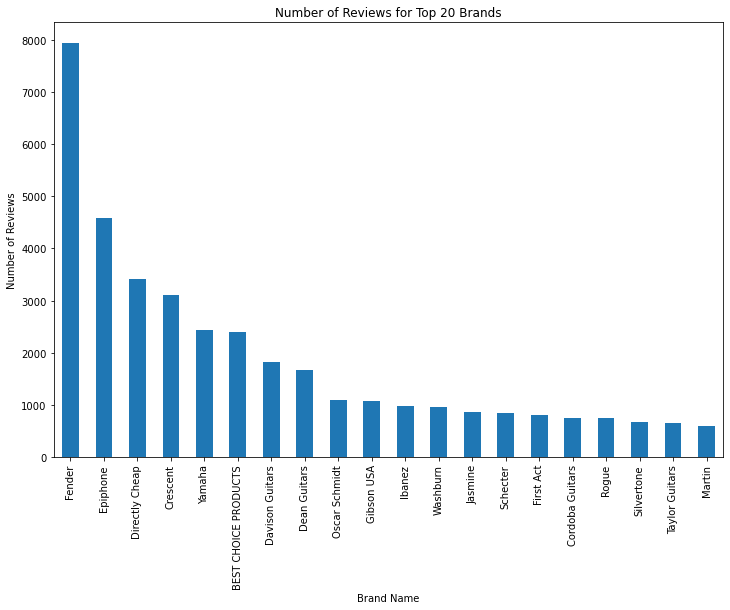

In [10]:
brands = df["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

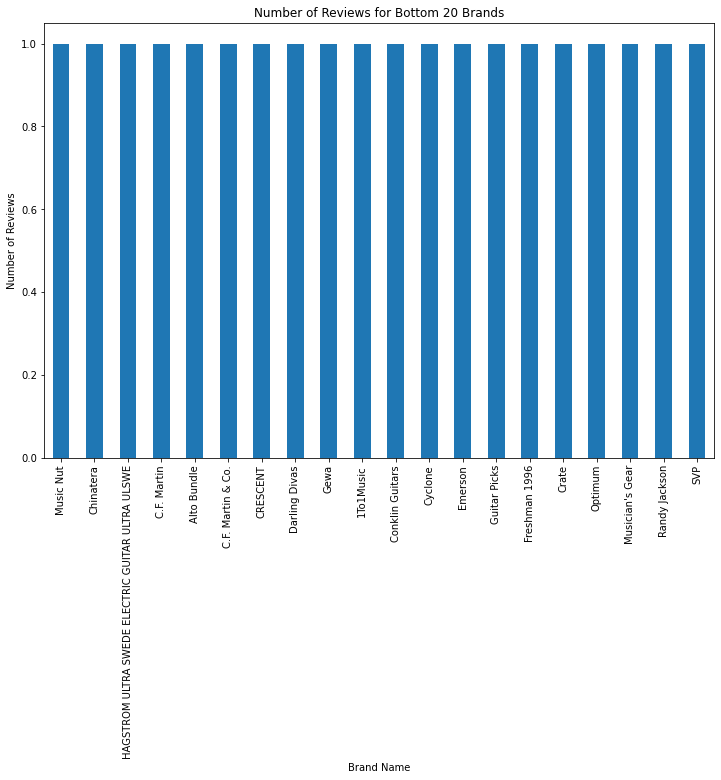

In [11]:
brands = df["brand"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[-20:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

In [15]:
df['title']= df['title'].str.replace('[&amp;,&quot;]', '')

Text(0, 0.5, 'Number of Reviews')

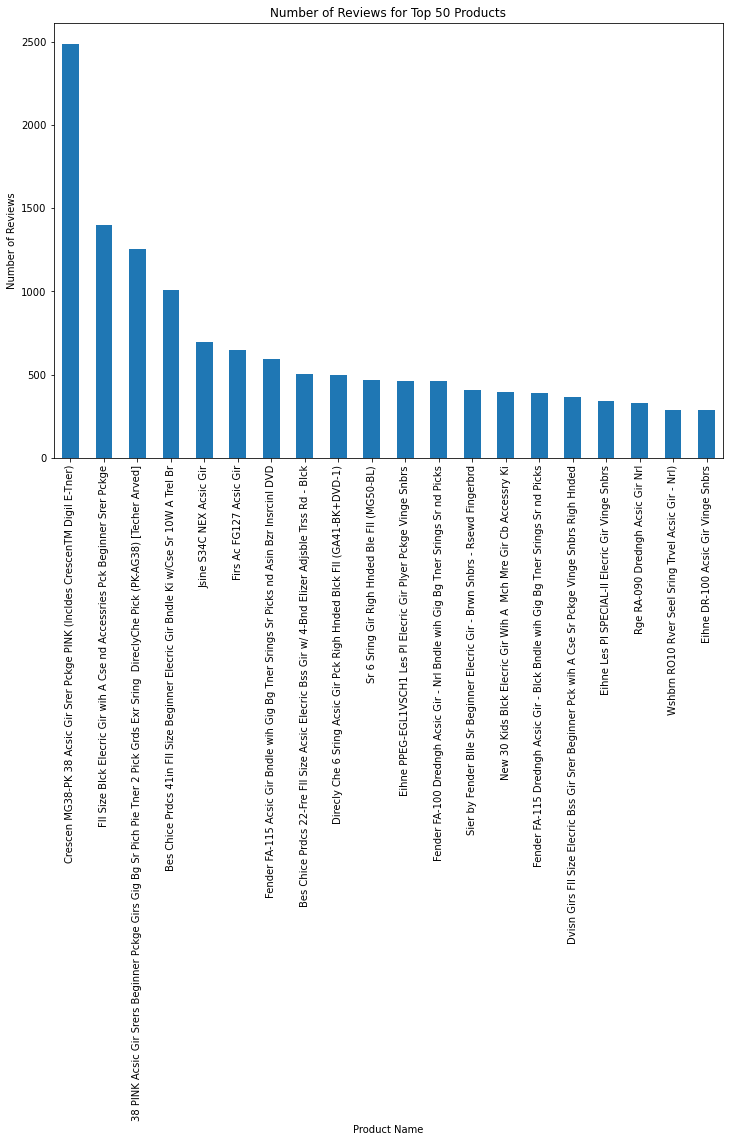

In [16]:
products = df["title"].value_counts()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

In [39]:
low_1 = df[(df['asin']=="B00004UE2D")]
low_1

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat,time,clean_text
0,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,2005-01-19,not bad not good either try c number time alwa...
1,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,2004-10-05,everyone seehems get good instrumen get horrib...
2,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,2004-08-28,happy classy yammy c first guitar could not ha...
3,4,A29CUCGRX04TS8,B00004UE2D,Sailoil,1092614400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",What do you want in a Guitar? When you approac...,good,2004-08-16,want guitar approach purchase musical instrume...
4,5,A121WJCKYJ4T03,B00004UE2D,taka(Japanese,1080086400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",The cost performance of Yamaha is great. Ymaha...,good,2004-03-24,cost performance yamaha great ymaha instrument...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33795,5,A10UWVJZRAJFA9,B00004UE2D,Dr. Bum,1514678400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",The PERFECT AFFORDABLE CLASSICAL GUITAR! Could...,good,2017-12-31,perfect affordable classical guitar could not ...
33796,4,A3DT2L7189B5R4,B00004UE2D,Sandra Linebarier,1512432000,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instr

In [40]:
apple_fplot = low_1.groupby(['unixReviewTime'])['Rating'].mean()
apple_fplot

unixReviewTime
975369600     5
1080086400    5
1092614400    4
1093651200    5
1096934400    1
             ..
1515283200    5
1517270400    5
1523232000    2
1524787200    4
1525046400    2
Name: Rating, Length: 104, dtype: int64

In [41]:
print(low_1['review_text'][1])

Everyone seems to get good instrumen I got horrible sample It seems to me everyone got exceptional instrument except me.  I don't understand what's so great about this guitar.  Action is just horrible.  I mean, look at 12 fret its 10 millimeters.  I don't know much about classical but it is not what I would call great playability.  Of course, you can play on this guitar, I do.  But it's hard.  I suppose, one shouldn't expect much from $100 dollars instrument.  But I repeat, it's not great.  Now about bass strings.  They sound bassy, as I suppose, they must.  But the thing is their bassines overpower trebles. Trebles sound unproportionally weak. And yes, yes.  I did changed strings on a good ones (D-Adario normal tension something) upon getting this guitar from Amazon  I should say though that guitar starts to sound much better now than it was when I just got it.  But action on this instrument still kills my fingers.  I do finger pushups in order to develop muscle on my phalanges, in or

In [42]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in low_1['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[5])

['yamaha', 'cr', 'classic', 'guitar', 'buy', 'guitar', 'son', 'love', 'much', 'play', 'great', 'sound', 'great']


In [43]:
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1

Total words : 1298


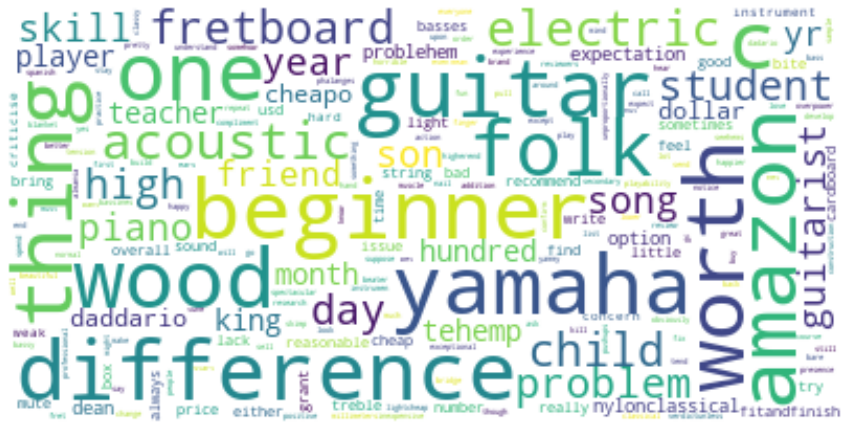

In [44]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words4.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Total words :",len(all_words4))

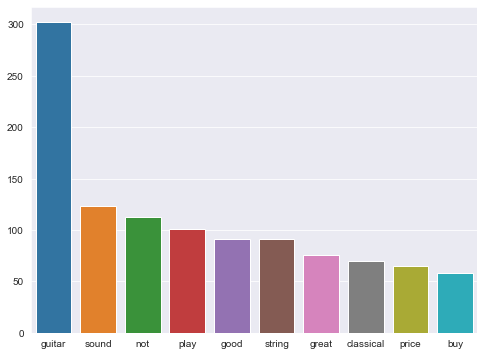

In [45]:
plt.figure(figsize = (8,6))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

In [81]:
low_2 = df[(df['asin']=="B000VSM4MS") & (df['Rating']<3)]
low_2

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat,time,clean_text
7691,2,A1TGBOOIBZOOML,B000VSM4MS,S. Grubbs,1232668800,"['Musical Instruments', 'Guitars', 'Acoustic G...","['This beautiful Austin Bazaar brand 38"" Acous...",Crescen MG38-PK 38 Acsic Gir Srer Pckge PINK (...,Crescent,['This steel string Guitar is 38 inches in len...,"['>#17,501 in Musical Instruments (See Top 100...",Musical Instruments,NaN,"September 6, 2007",$7.99,"Musical Instruments,Guitars,Acoustic Guitars,S...",OK buy- just did not get everthing in the desc...,bad,2009-01-23,ok buy not get everthing description guitar su...
7700,1,A3QUZTO2LMSVSQ,B000VSM4MS,Amazon Customer,1523577600,"['Musical Instruments', 'Guitars', 'Acoustic G...","['This beautiful Austin Bazaar brand 38"" Acous...",Crescen MG38-PK 38 Acsic Gir Srer Pckge PINK (...,Crescent,['This steel string Guitar is 38 inches in len...,"['>#17,501 in Musical Instruments (See Top 100...",Musical Instruments,NaN,"September 6, 2007",$7.99,"Musical Instruments,Guitars,Acoustic Guitars,S...",One Star Don't bother!!!!!,bad,2018-04-13,one star not bother
7703,2,A2DDWOQNHJLY9K,B000VSM4MS,Kimberla,1523318400,"['Musical Instruments', 'Guitars', 'Acoustic G...","['This beautiful Austin Bazaar brand 38"" Acous...",Crescen MG38-PK 38 Acsic Gir Srer Pckge PINK (...,Crescent,['This steel string Guitar is 38 inches in len...,"['>#17,501 in Musical Instruments (See Top 100...",Musical Instruments,NaN,"September 6, 2007",$7.99,"Musical Instruments,Guitars,Acoustic Guitars,S...",Not what I was expecting it is like a kids toy...,bad,2018-04-10,not expect like kid toy tune not expect like k...
7705,1,A1460E85RIZRHC,B000VSM4MS,Chad Helmick,1523145600,"['Musical Instruments', 'Guitars', 'Acoustic G...","['This beautiful Austin Bazaar brand 38"" Acous...",Crescen MG38-PK 38 Acsic Gir Srer Pckge PINK (...,Crescent,['This steel string Guitar is 38 inches in len...,"['>#17,501 in Musical Instruments (See Top 100...",Musical Instruments,NaN,"September 6, 2007",$7.99,"Musical Instruments,Guitars,Acoustic Guitars,S...",To be expected Plain and simple. You get what ...,bad,2018-04-08,expect plain simple get pay cheap cheap cheap ...
7707,1,AFPYT2IEADNIO,B000VSM4MS,Meredith,1522972800,"['Musical Instruments', 'Guitars', 'Acoustic G...","['This beautiful Austin Bazaar brand 38"" Acous...",Crescen MG38-PK 38 Acsic Gir Srer Pckge PINK (...,Crescent,['This steel string Guitar is 38 inches in len...,"['>#17,501 in Musical Instruments (See Top 100...",Musical Instruments,NaN,"September 6, 2007",$7.99,"Musical Instruments,Guitars,Acoustic Guitars,S...",One Star Tiny toy guitar. Very cheaply made. I...,bad,2018-04-06,one star tiny toy guitar cheaply make throw du...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37396,1,ARY3BW57TQLJU,B000VSM4MS,Amazon Customer,1524700800,"['Musical Instruments', 'Guitars', 'Acoustic G...","['This beautiful Austin Bazaar brand 38"" Acous...",Crescen MG38-PK 38 Acsic Gir Srer Pckge PINK (...,Crescent,['This steel string Guitar is 38 inches in len...,"['>#17,501 in Musical Instruments (See Top 100...",Musical Instruments,NaN,"September 6, 2007",$7.99,"Musical Instruments,Guitars,Acoustic Guitars,S...",cheap product. This item was not sent as it de...,bad,2018-04-26,cheap product itehem not send describe product...
37397,1,A3KQWMUF6N0VKM,B000VSM4MS,Felipe PErez,1524614400,"['Musical Instruments', 'Guitars', 'Acoustic G...","['This beautiful Austin Bazaar brand 38"" Acous...",Crescen MG38-PK 38 Acsic Gir Srer Pckge PINK (...,Crescent,['This steel string Guitar is 38 inches in len...,"['>#17,501 in Musical Instruments (See Top 100...",Musical Instruments,NaN,"September 6, 2007",$7.99,"Musical Instruments,Guitars,Acoustic Guitars,S...",One Star Defective,bad,2018-04-25,one star defective
37398,2,A1DN7M9L8SEGBI,B000VSM4MS,Javier,1524614400,"['Musical Instruments', 'Guit

In [82]:
print(low_2['review_text'][37401])

Stay FAR FAR Away Awful product. Don't buy. Spend extra to get a better guitar. The guitar is poorly built and refuses to stay in tune.


In [83]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in low_2['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[5])

['one', 'star', 'not', 'receive', 'blue', 'guitar', 'get', 'black', 'one', 'without', 'electronic', 'tuner']


In [84]:
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1

Total words : 2316


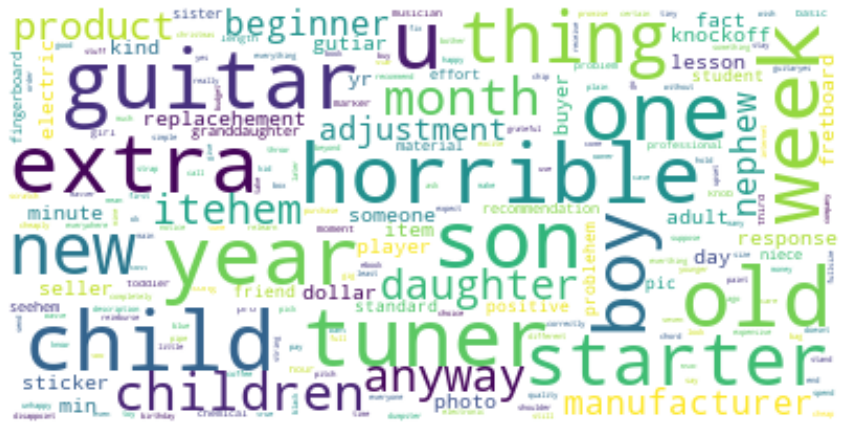

In [85]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words4.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Total words :",len(all_words4))

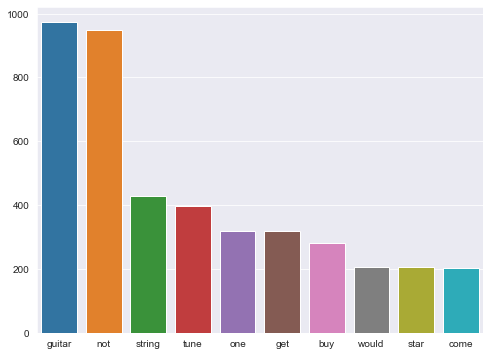

In [86]:
plt.figure(figsize = (8,6))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

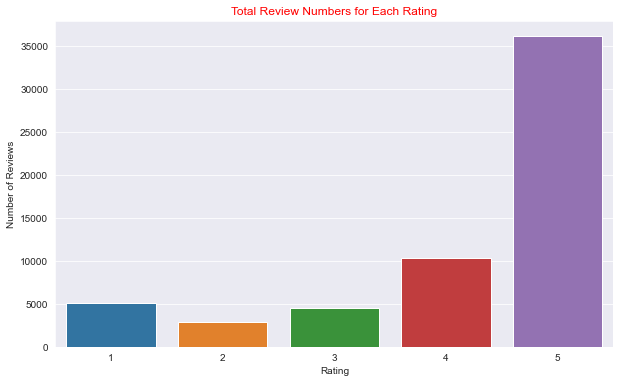

5    36163
4    10393
1     5068
3     4532
2     2892
Name: Rating, dtype: int64

In [87]:
plt.figure(figsize = (10,6))
sns.countplot(df['Rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['Rating'].value_counts()

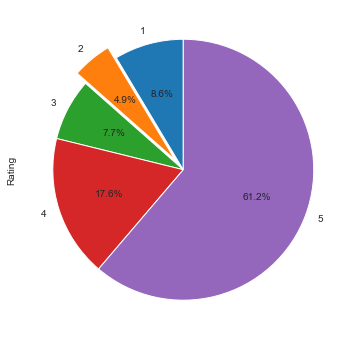

In [88]:
%matplotlib inline
plt.figure(figsize = (10,6))

df.groupby('Rating').Rating.count()
df.groupby('Rating').Rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [89]:
word_count=[]
for s1 in df.review_text:
    word_count.append(len(str(s1).split()))

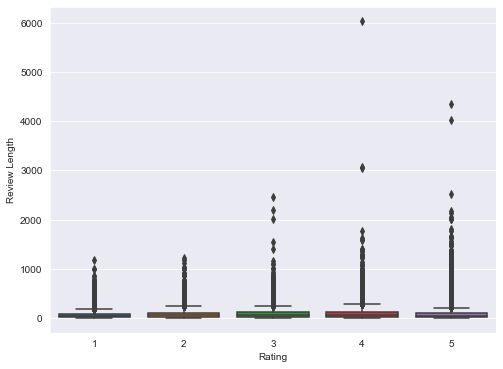

In [91]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="Rating",y=word_count,data=df)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

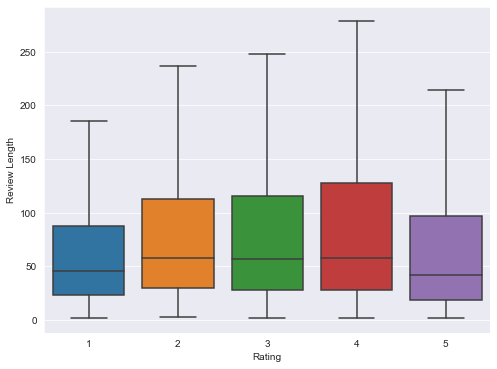

In [92]:
plt.figure(figsize = (8,6))

sns.boxplot(x="Rating",y=word_count,data=df,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

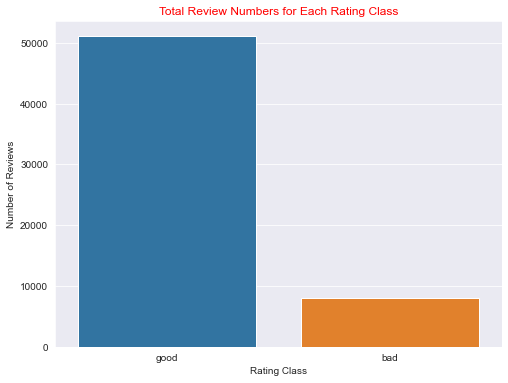

good    51088
bad      7960
Name: rating_cat, dtype: int64

In [93]:
plt.figure(figsize = (8,6))
sns.countplot(df['rating_cat'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['rating_cat'].value_counts()

In [95]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df = df.drop('time', axis = 1)
df.head(3)

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,rank,main_cat,similar_item,date,price,cat,review_text,rating_cat,clean_text,year
0,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,not bad not good either try c number time alwa...,2005
1,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,everyone seehems get good instrumen get horrib...,2004
2,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...","['>#13,455 in Musical Instruments (See Top 100...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,happy classy yammy c first guitar could not ha...,2004


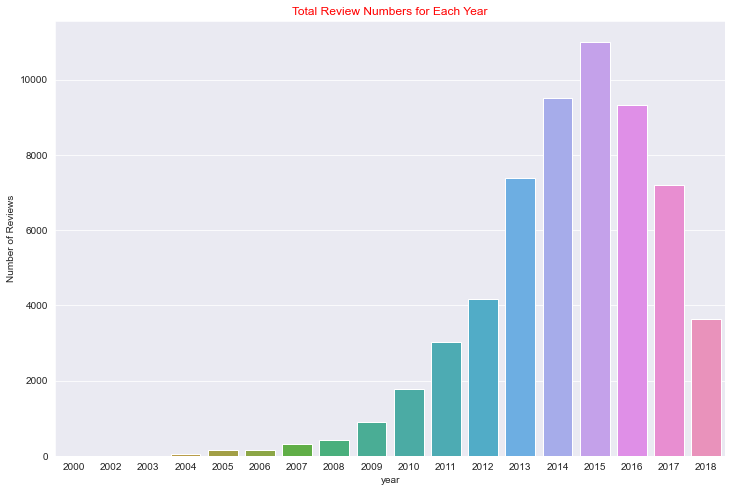

2015    11012
2014     9507
2016     9330
2013     7396
2017     7199
2012     4170
2018     3625
2011     3023
2010     1788
2009      905
2008      420
2007      314
2005      150
2006      143
2004       60
2003        4
2002        1
2000        1
Name: year, dtype: int64

In [96]:
plt.figure(figsize = (12,8))
sns.countplot(df['year'])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['year'].value_counts()

In [98]:
print('Number of unique customers: {}'.format(len(df['reviewerID'].unique())))

Number of unique customers: 53467


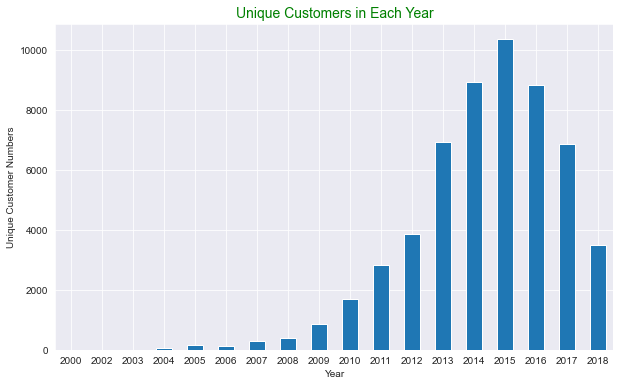

year
2000        1
2002        1
2003        4
2004       58
2005      146
2006      141
2007      305
2008      393
2009      860
2010     1682
2011     2815
2012     3873
2013     6927
2014     8941
2015    10356
2016     8829
2017     6865
2018     3506
Name: reviewerID, dtype: int64


In [100]:
unique_cust = df.groupby('year')['reviewerID'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0)
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

print(unique_cust)

In [101]:
a = list(df.groupby(['rating_cat'])['reviewerID'].unique())  

a2 = [len(a[0]),len(a[1])] 

b = list(df['rating_cat'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating_category': ['bad', 'good'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_category  number_of_customers  number_of_reviews
0             bad                 7753               7960
1            good                46323              51088


In [102]:
print('Number of unique guitar-related instruments products: {}'.format(len(df['asin'].unique())))

Number of unique guitar-related instruments products: 7570


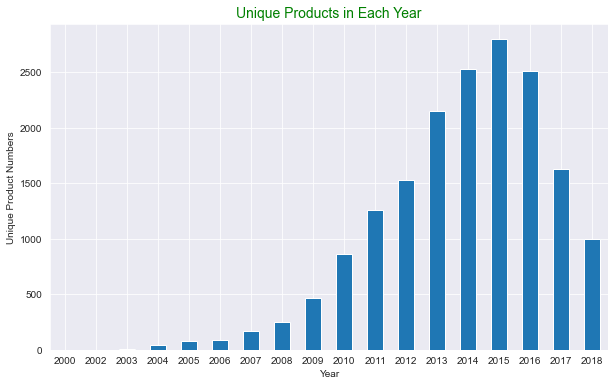

year
2000       1
2002       1
2003       3
2004      41
2005      78
2006      90
2007     168
2008     246
2009     464
2010     865
2011    1258
2012    1529
2013    2154
2014    2533
2015    2798
2016    2509
2017    1631
2018     999
Name: asin, dtype: int64


In [105]:
unique_prod = df.groupby('year')['asin'].nunique()


plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', rot =0)
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()


print(unique_prod)

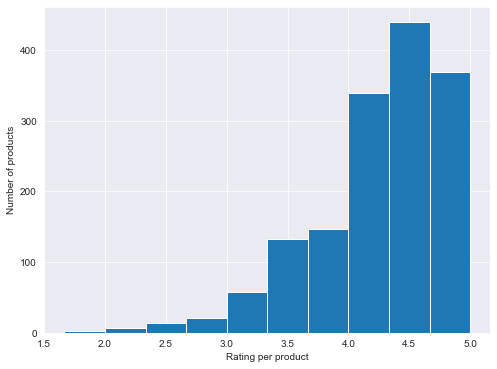

In [106]:
plt.figure(figsize = (8,6))

df1 = df.copy()
df1 = df1[np.isfinite(df1['Rating'])]
grp = df1.groupby('asin')
counts = grp.asin.count()        # number of reviews by each critic
means = grp.Rating.mean()     # average freshness for each critic

means[counts > 5].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Rating per product")
plt.ylabel("Number of products")
plt.show()

Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

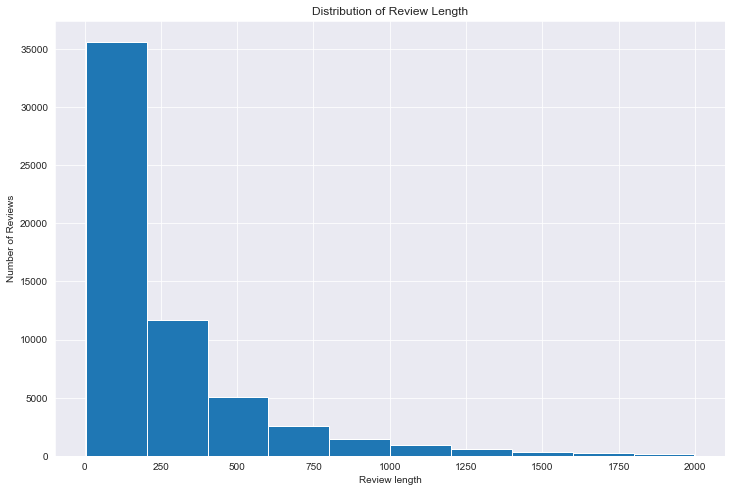

In [111]:
plt.figure(figsize = (15,8))

review_length = df["clean_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 2000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')

In [112]:
df['rating_category'] = df['rating_cat'].map({'good': 1, 'bad': 0})
    
feature = df.groupby('year').agg({'rating_category':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_category mean'] = feature['rating_category mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100
        
feature

,Year,Total Reviews,Relevant Rating Number,% of Relevant Rating Number in This Year,% of Relevant Rating in the Total
0,2000,1,1,100.000000,0.004459
1,2002,1,1,100.000000,0.004459
2,2003,4,3,75.000000,0.013378
3,2004,60,53,88.333333,0.236343
4,2005,150,123,82.000000,0.548495
5,2006,143,119,83.216783,0.530658
6,2007,314,270,85.987261,1.204013
7,2008,420,361,85.952381,1.609810
8,2009,905,784,86.629834,3.496098
9,2010,1788,1603,89.653244,7.148272


<Figure size 864x576 with 0 Axes>

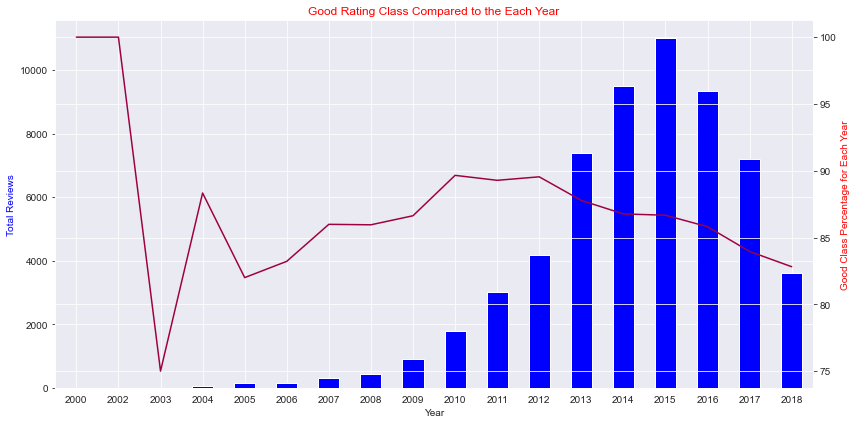

In [113]:
df['rating_category'] = df['rating_cat'].map({'good': 1, 'bad': 0})

feature = df.groupby('year').agg({'rating_category':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_category mean'] = feature['rating_category mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Year', color='r')
ax1.set_xlabel('Year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Year")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

In [116]:
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
df['clean_text'].dropna(inplace=True)
df['token'] = df['clean_text'].apply(token)

In [117]:
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
df['review_length'] = df['review_text'].apply(length)
df.head(3)

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,...,date,price,cat,review_text,rating_cat,clean_text,year,rating_category,token,review_length
0,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,"July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,not bad not good either try c number time alwa...,2005,1,"[not, bad, not, good, either, try, c, number, ...",303
1,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,"July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,everyone seehems get good instrumen get horrib...,2004,0,"[everyone, seehems, get, good, instrumen, get,...",278
2,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,"July 21, 2000",$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,happy classy yammy c first guitar could not ha...,2004,1,"[happy, classy, yammy, c, first, guitar, could...",186


In [118]:
df['review_length_bin'] = pd.cut(df['review_length'], np.arange(0,4800,100))
df.head()

,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,feature,...,price,cat,review_text,rating_cat,clean_text,year,rating_category,token,review_length,review_length_bin
0,3,A2S6XHXPUOUDPV,B00004UE2D,aztec,1106092800,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...","Not bad, but not too good either I've tried th...",good,not bad not good either try c number time alwa...,2005,1,"[not, bad, not, good, either, try, c, number, ...",303,"(300, 400]"
1,1,A1E8PWW106DRBE,B00004UE2D,Vasya,1096934400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Everyone seems to get good instrumen I got hor...,bad,everyone seehems get good instrumen get horrib...,2004,0,"[everyone, seehems, get, good, instrumen, get,...",278,"(200, 300]"
2,5,AHY195S8N3XSJ,B00004UE2D,scorpio ari,1093651200,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Happy with my classy Yammy The C40 is my first...,good,happy classy yammy c first guitar could not ha...,2004,1,"[happy, classy, yammy, c, first, guitar, could...",186,"(100, 200]"
3,4,A29CUCGRX04TS8,B00004UE2D,Sailoil,1092614400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",What do you want in a Guitar? When you approac...,good,want guitar approach purchase musical instrume...,2004,1,"[want, guitar, approach, purchase, musical, in...",663,"(600, 700]"
4,5,A121WJCKYJ4T03,B00004UE2D,taka(Japanese,1080086400,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,"['Designed for Beginners, with an Eye and Ear ...",...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",The cost performance of Yamaha is great. Ymaha...,good,cost performance yamaha great ymaha instrument...,2004,1,"[cost, performance, yamaha, great, ymaha, inst...",296,"(200, 300]"


In [119]:
per_pos_length = df.groupby(['review_length_bin'])['rating_category'].mean()
df['review_length_bin'] = df.review_length_bin.astype(str)
per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 100]         86.172881
(100, 200]       85.425987
(200, 300]       89.174412
(300, 400]       90.023474
(400, 500]       90.034762
(500, 600]       91.257996
(600, 700]       91.830065
(700, 800]       92.857143
(800, 900]       87.962963
(900, 1000]      94.117647
(1000, 1100]     93.877551
(1100, 1200]     83.870968
(1200, 1300]     87.500000
(1300, 1400]     93.333333
(1400, 1500]     84.615385
(1500, 1600]    100.000000
(1600, 1700]    100.000000
(1700, 1800]    100.000000
(1800, 1900]    100.000000
(1900, 2000]    100.000000
(2000, 2100]    100.000000
(2100, 2200]    100.000000
(2200, 2300]    100.000000
(2300, 2400]           NaN
(2400, 2500]    100.000000
(2500, 2600]    100.000000
(2600, 2700]           NaN
(2700, 2800]           NaN
(2800, 2900]    100.000000
(2900, 3000]           NaN
(3000, 3100]    100.000000
(3100, 3200]           NaN
(3200, 3300]           NaN
(3300, 3400]           NaN
(3400, 3500]           NaN
(3500, 3600]    100.000000
(3600, 370

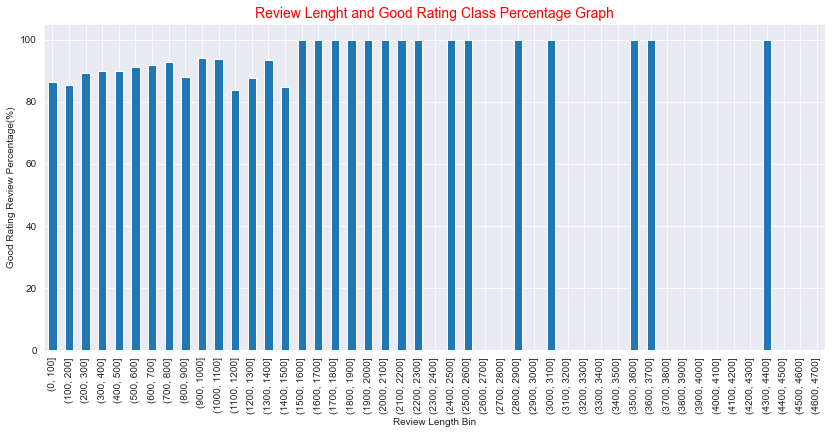

In [120]:
plt.figure(figsize = (14,6))
per_pos_length.plot(kind='bar')
plt.title('Review Lenght and Good Rating Class Percentage Graph', color = 'r', size = 14)
plt.xlabel('Review Length Bin')
plt.ylabel('Good Rating Review Percentage(%)')
plt.show()

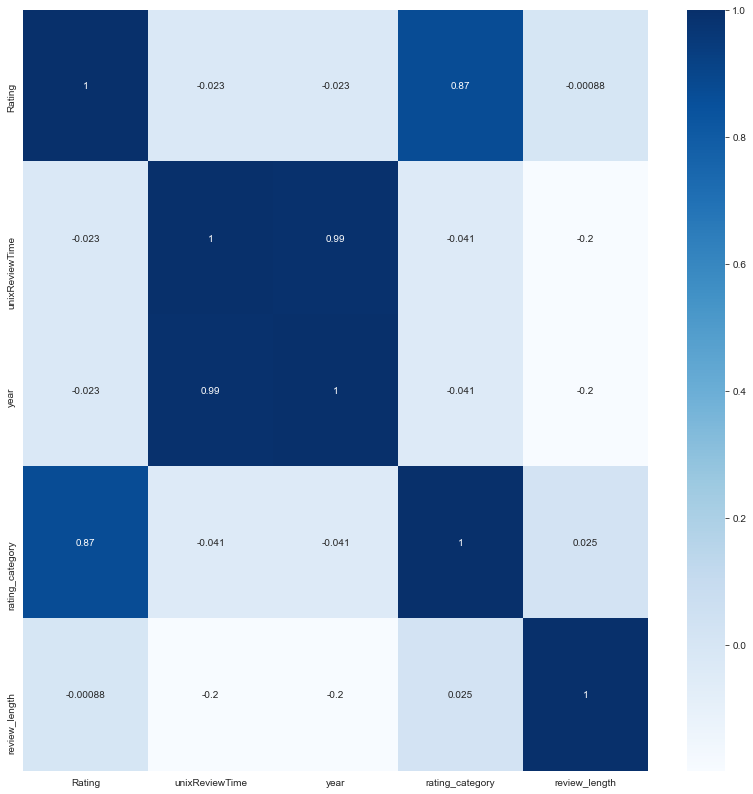

In [121]:
plt.figure(figsize = (14,14))
sns.heatmap(df.corr(method="pearson"), cmap='Blues', annot = True)

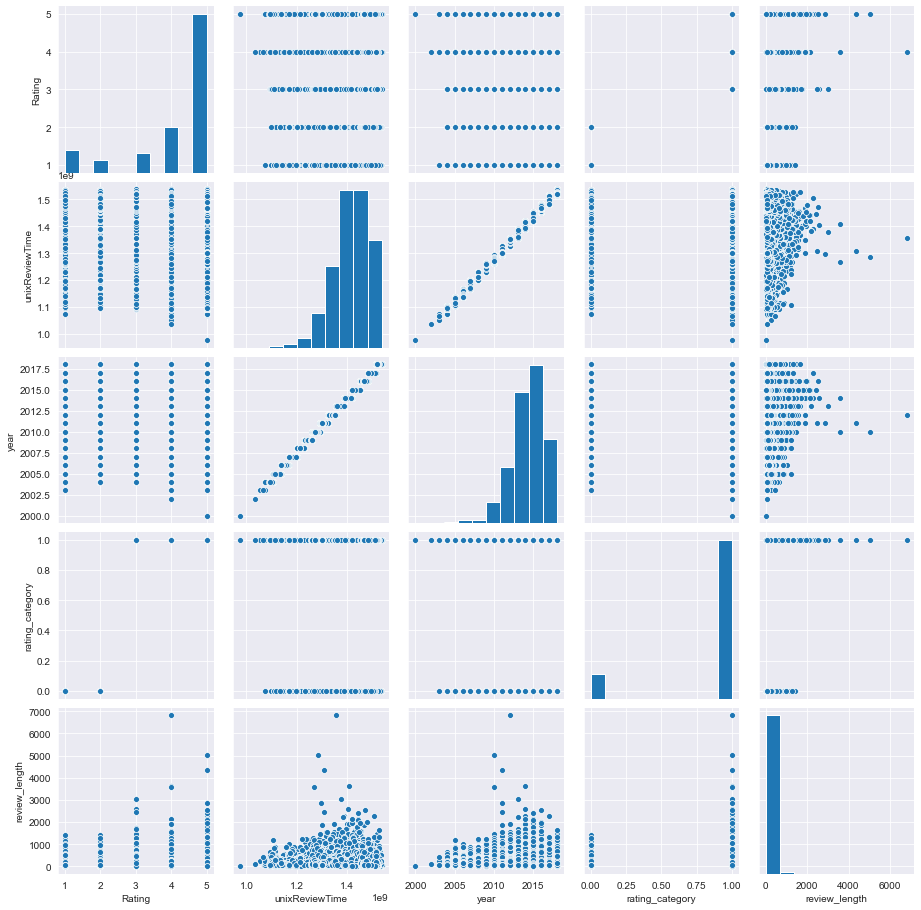

In [122]:
sns.pairplot(df)

In [123]:
df3 = df.drop(df[(df['review_length'] > 150) & (df['rating_cat'] == 'good')].index)

In [129]:
df4 = df3.drop(df3[(df3['year'] < 2009)].index)
df4.isnull().sum()

Rating                   0
reviewerID               0
asin                     0
reviewerName             3
unixReviewTime           0
category                 0
description              0
title                    0
brand                  396
feature                  0
rank                     0
main_cat                 0
similar_item         18838
date                     4
price                23038
cat                      0
review_text              0
rating_cat               0
clean_text               3
year                     0
rating_category          0
token                    3
review_length            0
review_length_bin        0
dtype: int64